<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/PricePrediction/kingcountyhouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm
%matplotlib inline
import seaborn as sns
from google.colab import files 
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
files.upload()

In [ ]:
data = pd.read_csv('kc_house_data.csv')
data = data.drop(columns=['id','date'])
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


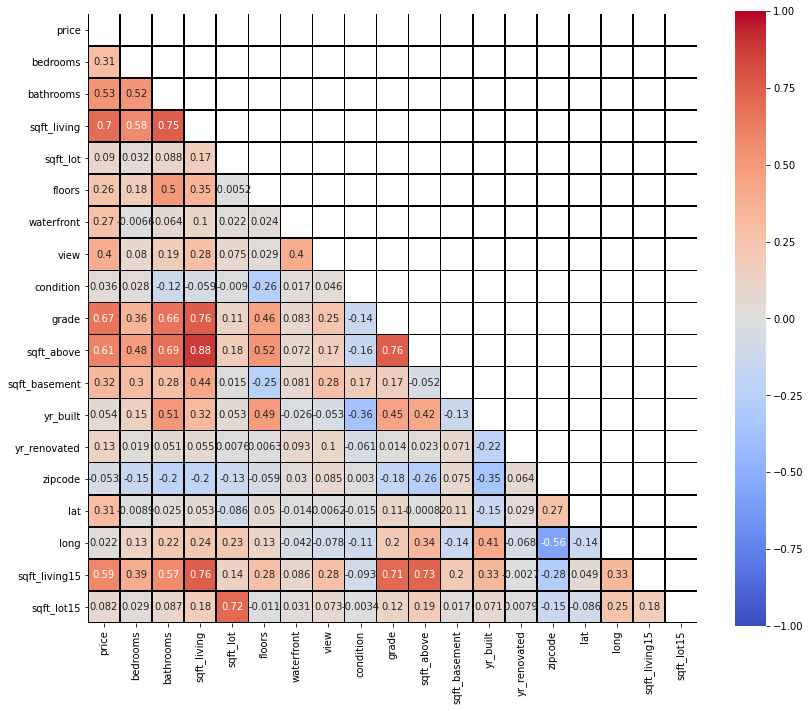

In [ ]:
corr = data.corr(method='pearson')
fig = plt.figure(figsize=(12,12))
plot = fig.add_subplot(1,1,1)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cm.coolwarm,
            linewidths=0.5, linecolor='black',
            square=True, mask = mask, 
            cbar_kws={"shrink": .75})
plt.tight_layout()

In [ ]:
data.shape

(21613, 19)

In [ ]:
Y = data['price'].values
data = data.drop(columns=['price'])
mms = MMS()
data = mms.fit_transform(data)

In [ ]:
trainX,testX,trainY,testY = tts(data,Y,test_size=0.12, random_state=42)

In [ ]:
trainX.shape

(19019, 18)

In [ ]:
lr = LinearRegression(normalize=True)
lr.fit(trainX,trainY)

ridge = Ridge(alpha = 7)
ridge.fit(trainX,trainY)

lasso = Lasso(alpha=.05)
lasso.fit(trainX,trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17098693385452.75, tolerance: 253740989628.26746
  positive)


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#function to visualize accuracy
def plot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Predicted Price', ylabel = 'Actual Price - Predicted Price', title = 'Accuracy Visualization')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

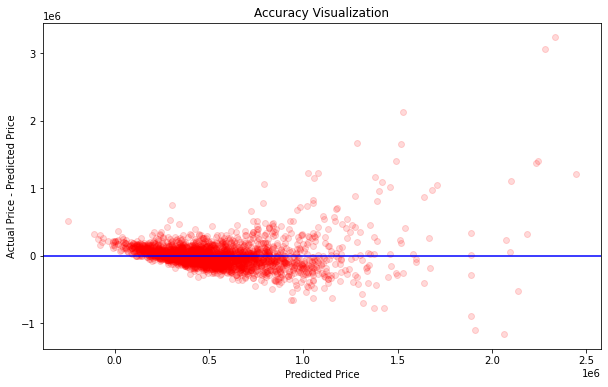

In [ ]:
plot(testY, lr.predict(testX), 'red', 'blue')

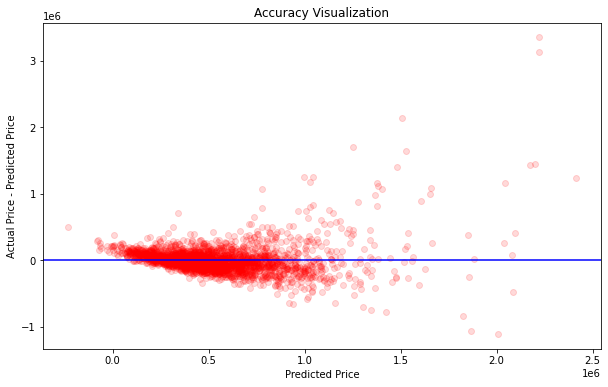

In [ ]:
plot(testY,ridge.predict(testX),'red','blue')

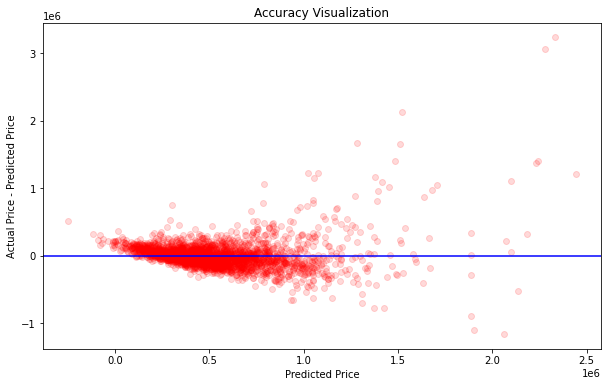

In [ ]:
plot(testY,lasso.predict(testX),'red','blue')

In [ ]:
print("Average Error:")
print("Linear Regression: ", (np.sqrt((lr.predict(testX)-testY)**2)).mean())
print("Ridge: ", (np.sqrt((ridge.predict(testX)-testY)**2)).mean())
print("Lasso: ", (np.sqrt((lasso.predict(testX)-testY)**2)).mean())

Average Error:
Linear Regression:  127806.43346322587
Ridge:  127338.00603556582
Lasso:  127693.82357778188
